In [2]:
pip install kaggle

     ---------------------------------------- 0.0/82.7 kB ? eta -:--:--
     -------------- ------------------------- 30.7/82.7 kB 1.3 MB/s eta 0:00:01
     ---------------------------------------- 82.7/82.7 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/167.3 kB ? eta -:--:--
     -------------------------------- ----- 143.4/167.3 kB 2.8 MB/s eta 0:00:01
     -------------------------------------- 167.3/167.3 kB 2.5 MB/s eta 0:00:00
  Created wheel for kaggle: filename=kaggle-1.6.17-py3-none-any.whl size=105802 sha256=af0d9d624caac7dd2afd7923af76f981572c3b1d41050151214e488883664d6e
  Stored in directory: c:\users\acer\appdata\local\pip\cache\wheels\2b\af\a9\70bffa2773af622d2ebea9c8d407720b86e67bd40c465bf837
Successfully built kaggle
  Attempting uninstall: certifi
    Found existing installation: certifi 2023.5.7
    Uninstalling certifi-2023.5.7:
      Succ

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.41 requires requests_mock, which is not installed.
conda-repo-cli 1.0.41 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.41 requires nbformat==5.4.0, but you have nbformat 5.7.0 which is incompatible.
conda-repo-cli 1.0.41 requires requests==2.28.1, but you have requests 2.29.0 which is incompatible.


In [9]:
import kaggle

dataset_name = 'tevecsystems/retail-sales-forecasting'
path = r'C:\Users\Acer\Desktop\Projects\Excon\Dataset'  # Use raw string notation
# Download dataset
kaggle.api.dataset_download_files(dataset_name, path=path, unzip=True)

print("Dataset downloaded successfully.")


Dataset URL: https://www.kaggle.com/datasets/tevecsystems/retail-sales-forecasting
Dataset downloaded successfully.


In [16]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\Acer\Desktop\Projects\Excon\Dataset\mock_kaggle.csv")

# Convert 'data' column to datetime
df['data'] = pd.to_datetime(df['data'])

# Check for missing values and data types
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Fill or drop missing values (if necessary)
df.fillna(method='ffill', inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   data     937 non-null    datetime64[ns]
 1   venda    937 non-null    int64         
 2   estoque  937 non-null    int64         
 3   preco    937 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 29.4 KB
None
data       0
venda      0
estoque    0
preco      0
dtype: int64


In [17]:
# Summary statistics for sales, inventory, and price
statistics = df[['venda', 'estoque', 'preco']].describe()
print(statistics)


            venda      estoque       preco
count  937.000000   937.000000  937.000000
mean    90.533618  1608.258271    1.592572
std     80.682089  1356.691877    0.529502
min      0.000000     0.000000    0.000000
25%     33.000000   794.000000    1.290000
50%     76.000000  1348.000000    1.390000
75%    127.000000  1964.000000    1.890000
max    542.000000  7228.000000    2.980000


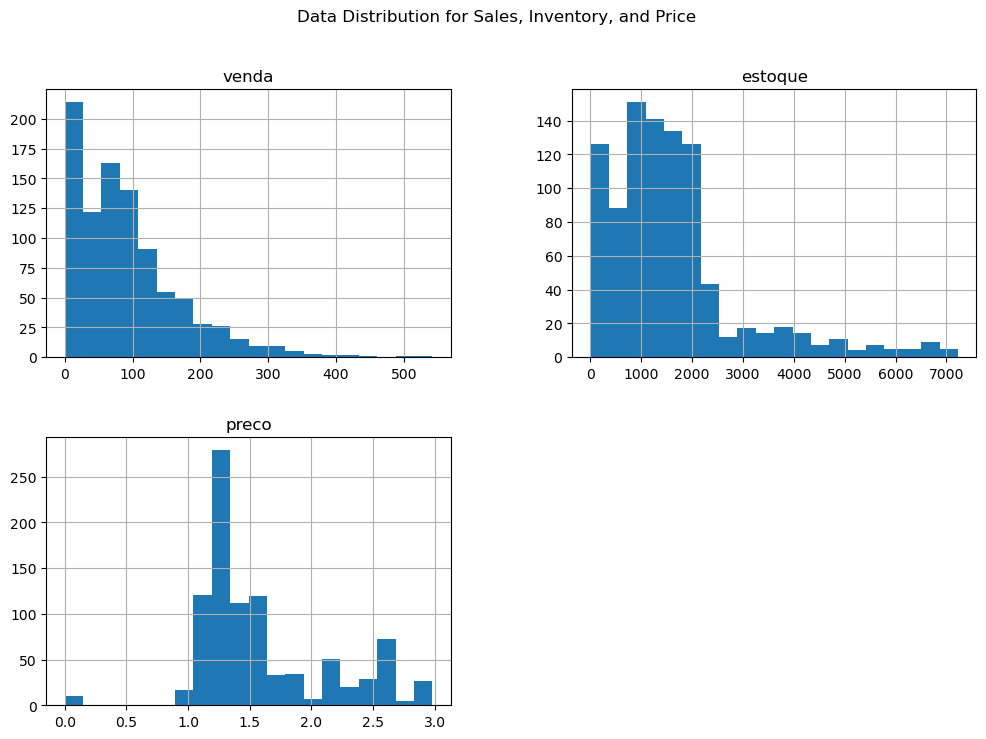

In [21]:
import matplotlib.pyplot as plt

# Histograms for sales, inventory, and price
df[['venda', 'estoque', 'preco']].hist(bins=20, figsize=(12, 8))
plt.suptitle("Data Distribution for Sales, Inventory, and Price")
plt.show()

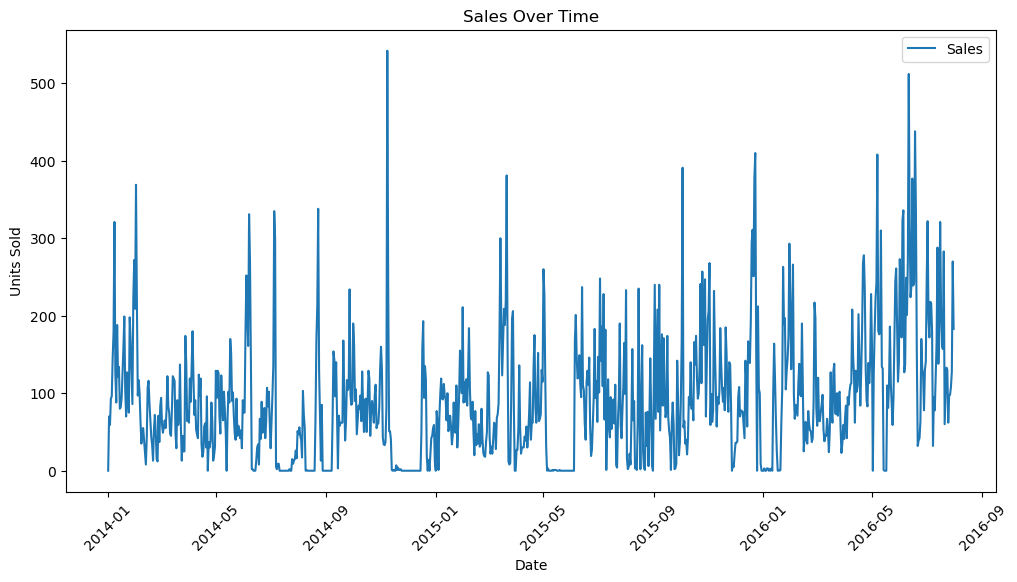

In [22]:
import seaborn as sns

# Plot sales trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='data', y='venda', label='Sales')
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.xticks(rotation=45)
plt.show()


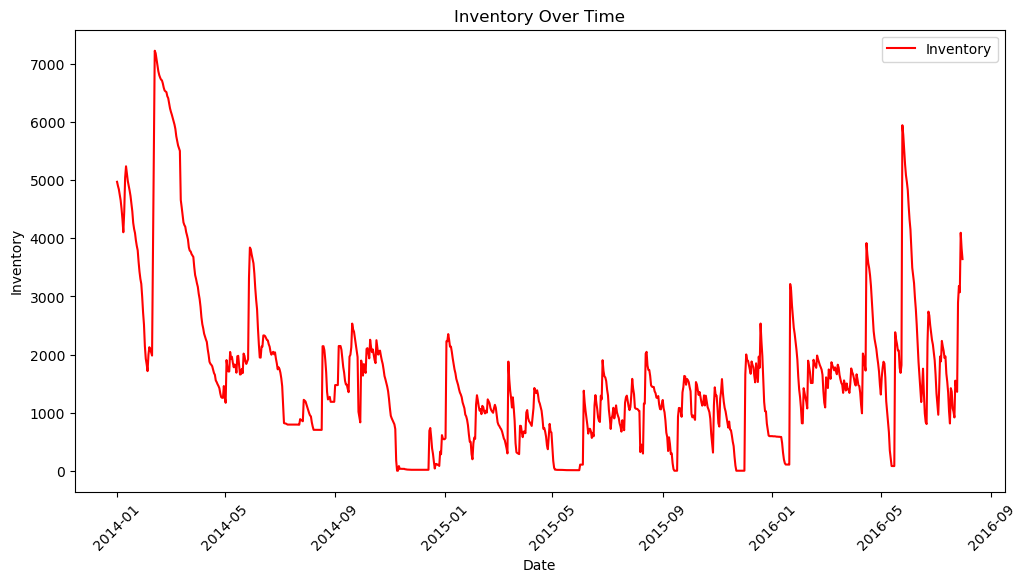

In [23]:
# Plot inventory trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='data', y='estoque', label='Inventory', color='red')
plt.title('Inventory Over Time')
plt.xlabel('Date')
plt.ylabel('Inventory')
plt.xticks(rotation=45)
plt.show()


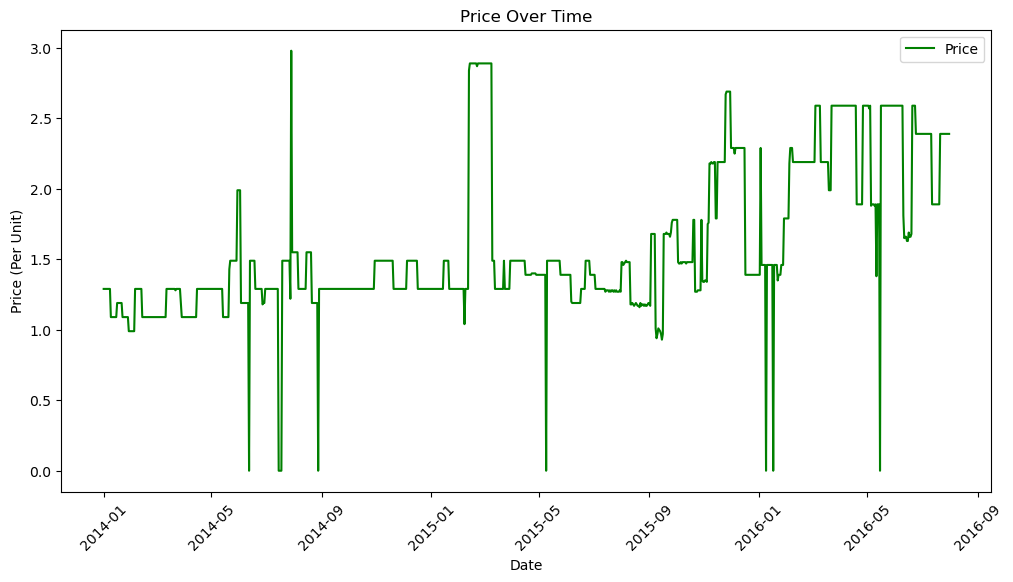

In [24]:
# Plot price trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='data', y='preco', label='Price', color='green')
plt.title('Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (Per Unit)')
plt.xticks(rotation=45)
plt.show()


            venda   estoque     preco
venda    1.000000  0.153659  0.094779
estoque  0.153659  1.000000 -0.032604
preco    0.094779 -0.032604  1.000000


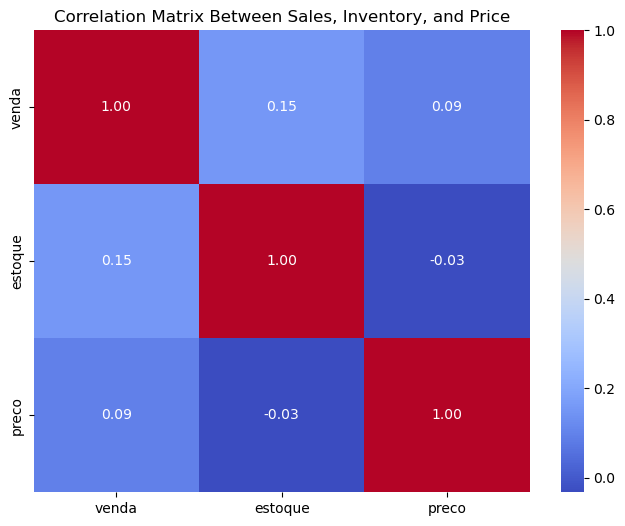

In [25]:
# Correlation between sales, inventory, and price
correlation_matrix = df[['venda', 'estoque', 'preco']].corr()
print(correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Between Sales, Inventory, and Price')
plt.show()


In [27]:
# Ensure 'data' column is datetime
df['data'] = pd.to_datetime(df['data'])
#Set date as index
df.set_index('data', inplace=True)


In [28]:
from statsmodels.tsa.stattools import adfuller

# Perform the ADF test
result = adfuller(df['venda'])

print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Interpretation
if result[1] < 0.05:
    print("The data is stationary.")
else:
    print("The data is non-stationary.")


ADF Statistic: -5.326902281189415
p-value: 4.81508920136554e-06
The data is stationary.


In [29]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model = ARIMA(df['venda'], order=(5,1,0))  # (p,d,q), p = AR term, d = differencing, q = MA term
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())


C:\Users\Acer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Acer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  venda   No. Observations:                  937
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -5192.973
Date:                Sun, 10 Nov 2024   AIC                          10397.946
Time:                        23:34:06   BIC                          10426.995
Sample:                             0   HQIC                         10409.022
                                - 937                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3156      0.022    -14.269      0.000      -0.359      -0.272
ar.L2         -0.3471      0.026    -13.152      0.000      -0.399      -0.295
ar.L3         -0.2201      0.031     -7.140      0.0

C:\Users\Acer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


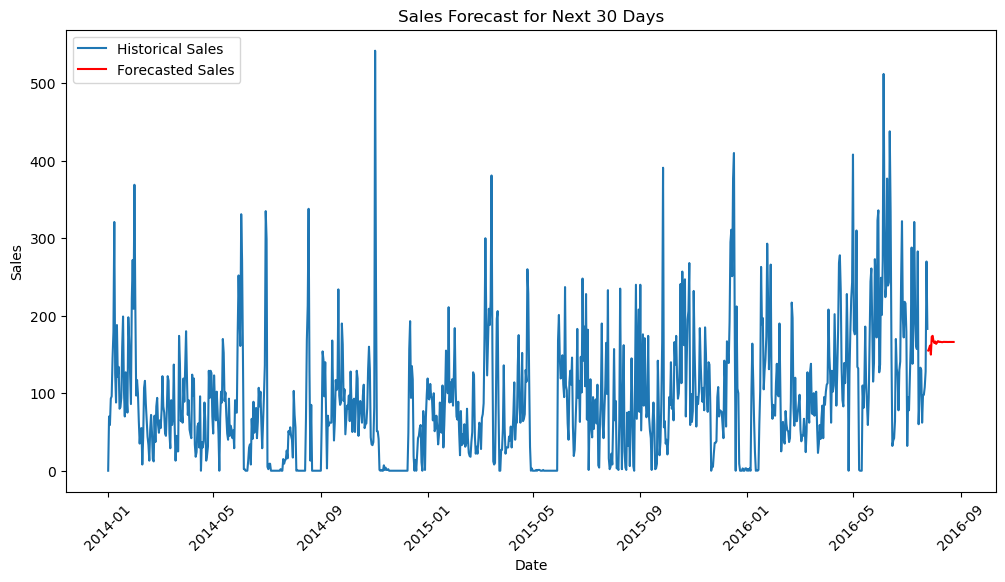

In [33]:
# If your DataFrame has a known frequency, you can create a 'data' column manually
df['data'] = pd.date_range(start='2014-01-01', periods=len(df), freq='D')

# Now, set the 'data' column as the index
df.set_index('data', inplace=True)

# Proceed with forecasting
forecast = model_fit.forecast(steps=30)
forecast_dates = pd.date_range(df.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')

# Plot the historical and forecasted sales
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['venda'], label='Historical Sales')
plt.plot(forecast_dates, forecast, label='Forecasted Sales', color='red')
plt.title('Sales Forecast for Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [34]:

pip install plotly dash


     ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
     ---------------------------------------- 0.1/7.8 MB 1.6 MB/s eta 0:00:05
      --------------------------------------- 0.2/7.8 MB 2.1 MB/s eta 0:00:04
     - -------------------------------------- 0.3/7.8 MB 2.5 MB/s eta 0:00:03
     -- ------------------------------------- 0.4/7.8 MB 2.5 MB/s eta 0:00:03
     --- ------------------------------------ 0.7/7.8 MB 3.0 MB/s eta 0:00:03
     ---- ----------------------------------- 0.9/7.8 MB 3.4 MB/s eta 0:00:03
     ----- ---------------------------------- 1.1/7.8 MB 3.5 MB/s eta 0:00:02
     ------- -------------------------------- 1.4/7.8 MB 3.9 MB/s eta 0:00:02
     ------- -------------------------------- 1.5/7.8 MB 3.9 MB/s eta 0:00:02
     -------- ------------------------------- 1.6/7.8 MB 3.5 MB/s eta 0:00:02
     --------- ------------------------------ 1.8/7.8 MB 3.6 MB/s eta 0:00:02
     ---------- ----------------------------- 2.0/7.8 MB 3.7 MB/s eta 0

In [40]:
import dash
from dash import dcc, html
import plotly.graph_objs as go
import pandas as pd
import numpy as np

# Create a simple Dash app
app = dash.Dash(__name__)

# Prepare historical and forecasted data
forecast_dates = pd.date_range(df.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')
forecast = model_fit.forecast(steps=30)

# Historical sales
historical_trace = go.Scatter(
    x=df.index, y=df['venda'], mode='lines', name='Historical Sales'
)

# Forecasted sales
forecast_trace = go.Scatter(
    x=forecast_dates, y=forecast, mode='lines', name='Forecasted Sales', line=dict(color='red')
)

# Layout for the dashboard
app.layout = html.Div(children=[
    html.H1(children='Sales Data Forecasting Dashboard'),
    
    dcc.Graph(
        id='sales-forecast-graph',
        figure={
            'data': [historical_trace, forecast_trace],
            'layout': go.Layout(
                title='Sales Forecast for Next 30 Days',
                xaxis={'title': 'Date'},
                yaxis={'title': 'Sales'},
                showlegend=True
            )
        }
    ),
    
    html.Div(children='''
        Use this dashboard to explore historical and forecasted sales data interactively.
    ''')
])

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


C:\Users\Acer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

